🐘 Elephant detection using OpenCV

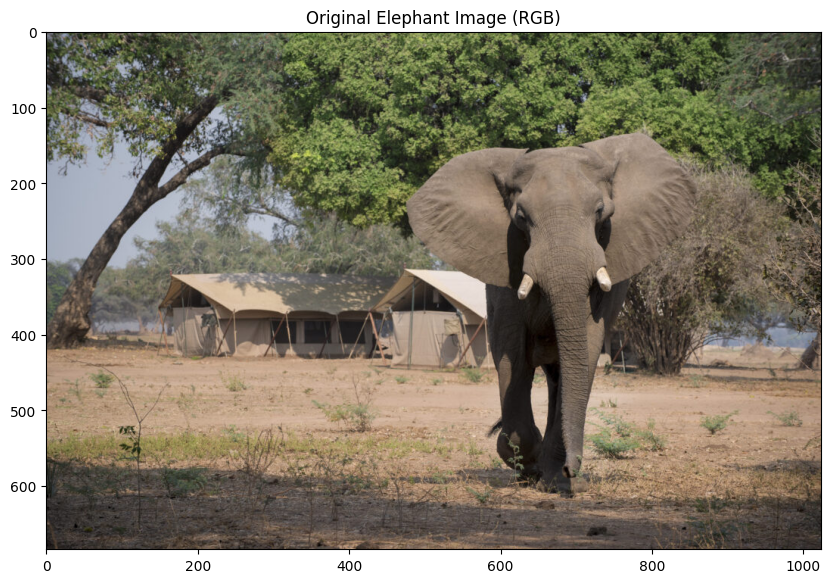

Image shape: (684, 1024, 3)


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = '/content/elephant_image.jpg'
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title("Original Elephant Image (RGB)")
plt.axis("on")
plt.show()

print("Image shape:", image_rgb.shape)

In [8]:
from google.colab import output
output.enable_custom_widget_manager()

In [9]:
import ipywidgets as widgets
from IPython.display import display
from ipyevents import Event
from PIL import Image
from io import BytesIO


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert full-size image to PNG bytes
def array_to_png_bytes(arr):
    img_pil = Image.fromarray(arr)
    with BytesIO() as output_bytes:
        img_pil.save(output_bytes, format='PNG')
        return output_bytes.getvalue()

# Create image widget with original size
height, width, _ = image_rgb.shape
png_bytes = array_to_png_bytes(image_rgb)

image_widget = widgets.Image(
    value=png_bytes,
    format='png',
    layout=widgets.Layout(width=f"{width}px", height=f"{height}px")
)
display(image_widget)

# Setup event handler for clicks
event = Event(source=image_widget, watched_events=['click'])

def handle_event(event_data):
    x = int(event_data['offsetX'])
    y = int(event_data['offsetY'])
    print(f"Clicked at: X={x}, Y={y}")

event.on_dom_event(handle_event)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x02\xac\x08\x02\x00\x00\x00\xfdqX{\x…

Clicked at: X=492, Y=234
Clicked at: X=552, Y=176
Clicked at: X=606, Y=324
Clicked at: X=562, Y=245
Clicked at: X=624, Y=201
Clicked at: X=671, Y=156
Clicked at: X=740, Y=207
Clicked at: X=769, Y=144
Clicked at: X=844, Y=227
Clicked at: X=756, Y=309
Clicked at: X=637, Y=310
Clicked at: X=722, Y=297
Clicked at: X=691, Y=387
Clicked at: X=600, Y=361
Clicked at: X=662, Y=421
Clicked at: X=748, Y=358
Clicked at: X=613, Y=444
Clicked at: X=624, Y=521
Clicked at: X=695, Y=433
Clicked at: X=696, Y=499
Clicked at: X=695, Y=560
Clicked at: X=661, Y=579
Clicked at: X=695, Y=597


In [10]:
sample_coords = [
    (234,492),
    (176,552),
    (324,606),
    (245,562),
    (201,624),
    (156,671),
    (207,740),
    (144,769),
    (227,844),
    (309,756),
    (310,637),
    (297,722),
    (387,691),
    (361,600),
    (421,662),
    (358,748),
    (444,613),
    (521,624),
    (433,695),
    (499,696),
    (560,695),
    (579,661),
    (597,695)
]

sample_rgb_values = []

for coord in sample_coords:
  y, x = coord
  rgb = image_rgb[y, x]
  sample_rgb_values.append(rgb)

for i in range(len(sample_coords)):
  coord = sample_coords[i]
  rgb = sample_rgb_values[i]
  print(f"P{i+1} at {coord} the rgb values is{rgb}")

P1 at (234, 492) the rgb values is[147 129 115]
P2 at (176, 552) the rgb values is[157 138 124]
P3 at (324, 606) the rgb values is[107  89  69]
P4 at (245, 562) the rgb values is[143 122 103]
P5 at (201, 624) the rgb values is[112  98  87]
P6 at (156, 671) the rgb values is[180 160 149]
P7 at (207, 740) the rgb values is[141 122 105]
P8 at (144, 769) the rgb values is[180 161 147]
P9 at (227, 844) the rgb values is[148 129 115]
P10 at (309, 756) the rgb values is[116  97  80]
P11 at (310, 637) the rgb values is[144 125 110]
P12 at (297, 722) the rgb values is[151 132 115]
P13 at (387, 691) the rgb values is[109  93  78]
P14 at (361, 600) the rgb values is[48 44 43]
P15 at (421, 662) the rgb values is[28 19 10]
P16 at (358, 748) the rgb values is[53 49 46]
P17 at (444, 613) the rgb values is[98 76 65]
P18 at (521, 624) the rgb values is[33 29 28]
P19 at (433, 695) the rgb values is[60 46 35]
P20 at (499, 696) the rgb values is[115 101  90]
P21 at (560, 695) the rgb values is[154 144 134

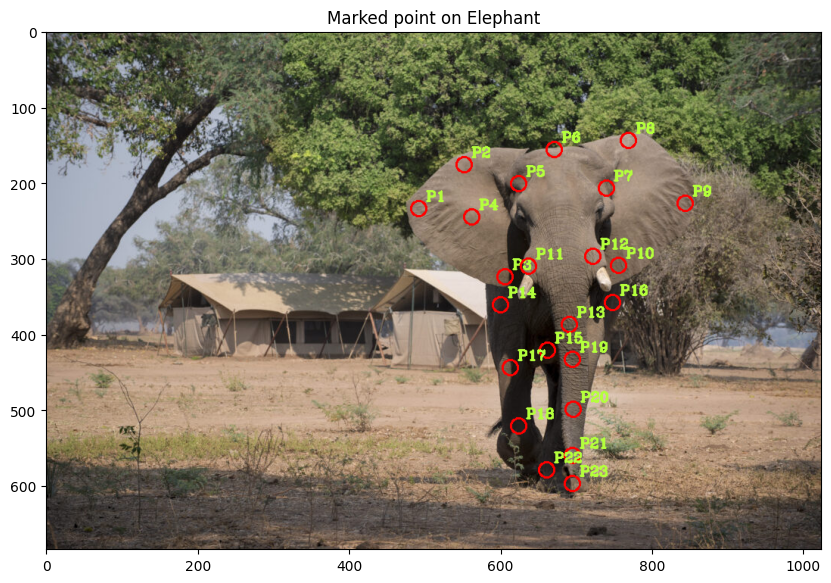

In [11]:
# Mark of points on the image

image_marked = image_rgb.copy()
index = 1

for i in range(len(sample_coords)):
  coord = sample_coords[i]
  y = coord[0]
  x = coord[1]

  cv2.circle(image_marked, (x,y), 10, (255,0,0), 2)

  # lets put some marking
  cv2.putText(image_marked, f"P{index}", (x+10, y-10), cv2.FONT_HERSHEY_COMPLEX, 0.6, (180,255,60), 2)
  index+=1

plt.figure(figsize=(10, 8))
plt.imshow(image_marked)
plt.title("Marked point on Elephant")
plt.axis("on")
plt.show()

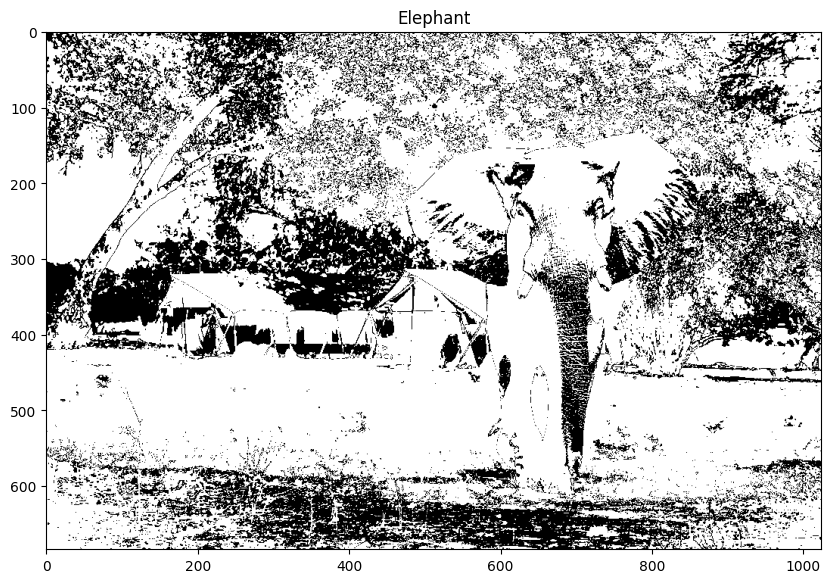

In [13]:
lower_threshold = [45,55,67]
upper_threshold = [129,149,165]

height = image_rgb.shape[0]
width =  image_rgb.shape[1]

elephant_detected = np.ones((height, width), dtype = np.uint8)*255

for i in range(height):
  for j in range(width):
    pixel = image_rgb[i,j]
    r,g,b = pixel[0], pixel[1], pixel[2]

    if(lower_threshold[0] <= r <= upper_threshold[0] and lower_threshold[1] <= g <= upper_threshold[1] and lower_threshold[2] <= b <= upper_threshold[2]):
      elephant_detected[i,j] = 0
    else:
      elephant_detected[i,j] = 255

plt.figure(figsize=(10, 8))
plt.imshow(elephant_detected, cmap='gray')
plt.title("Elephant")
plt.axis("on")
plt.show()